In [5]:
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style
import mpld3
#from mpld3 import plugins
#import jinja2
#from mpld3._objects import D3Line2D, D3Collection
#mpld3.disable_notebook()

In [6]:
style.use("ggplot")

In [7]:
%matplotlib inline

In [8]:
ir1 = "/var/seq_data/Chazy/ITS_SIP/Pool1/Index1.fastq.gz"
ir2 = "/var/seq_data/Chazy/ITS_SIP/Pool1/Index2.fastq.gz"

In [ ]:
screed.read_fastq_sequences(ir1)
screed.read_fastq_sequences(ir2)

In [12]:
ir1db = screed.ScreedDB(ir1)
ir2db = screed.ScreedDB(ir2)

In [21]:
df_map = pd.read_csv("data/Metadata_Pool1_ITS_copy.txt", delimiter="\t", usecols=[1,6,7], names=["SampleID","i1","i2"])
df_map

,SampleID,i1,i2
0,Full_sample,i1,i2
1,13C.PTH.D7.R4_Frac5,cgagagtt,atcgtacg
2,13C.PTH.D7.R4_Frac6,cgagagtt,actatctg
3,13C.PTH.D7.R4_Frac7,cgagagtt,tagcgagt
4,13C.PTH.D7.R4_Frac8,cgagagtt,ctgcgtgt
5,13C.PTH.D7.R4_Frac9,cgagagtt,tcatcgag
6,13C.PTH.D7.R4_Frac10,cgagagtt,cgtgagtg
7,13C.PTH.D7.R4_Frac11,cgagagtt,ggatatct
8,13C.PTH.D7.R4_Frac12,cgagagtt,gacaccgt
9,13C.PTH.D7.R4_Frac13,gacatagt,atcgtacg


In [22]:
map_d = dict(map(lambda x: (x[0] + x[1], x[2]), zip(df_map.i1, df_map.i2, df_map.SampleID)))
print map_d.keys()[10], map_d[map_d.keys()[10]]

actcactgggatatct 13X.NTH.D3.R4_Frac10


In [23]:
print map_d

{'tgagtacgactatctg': '13X.NTH.D3.R4_Frac13', 'gatctacgcgtgagtg': '13X.NTH.D7.R4_Frac15', 'tatagcgagacaccgt': '13C.PTH.D30.R4_Frac25', 'gtaacgagcgtgagtg': '13X.NTH.D7.R4_Frac23', 'gtctatgactgcgtgt': '13C.PTH.D30.R4_Frac13', 'ctcgactttcatcgag': '12C.NTH.D7.R4_Frac6', 'tctctatgggatatct': '13X.NTH.D7.R4_Frac8', 'gtaacgagctgcgtgt': '13X.NTH.D7.R4_Frac21', 'tagtctccggatatct': '13C.PTH.D14.R4_Frac9', 'tatagcgaactatctg': '13C.PTH.D30.R4_Frac19', 'actcactgggatatct': '13X.NTH.D3.R4_Frac10', 'tagcagctactatctg': '12C.NTH.D7.R4_Frac19', 'tatagcgatcatcgag': '13C.PTH.D30.R4_Frac22', 'tagtctccatcgtacg': '13X.NTH.D3.R4_Frac28', 'atagtacccgtgagtg': '12C.NTH.D30.R4_Frac14', 'tgctcgtacgtgagtg': '13C.NTH.D7.R4_Frac6', 'acgctacttcatcgag': '13C.PTH.D7.R4_Frac25', 'acgctactctgcgtgt': '13C.PTH.D7.R4_Frac24', 'ctgcgtagactatctg': '13X.NTH.D3.R4_Frac21', 'tagcagctctgcgtgt': '12C.NTH.D7.R4_Frac21', 'actacgaccgtgagtg': '13C.PTH.D14.R4_Frac24', 'ctcgacttctgcgtgt': '12C.NTH.D7.R4_Frac5', 'acgtgcgccgtgagtg': '12C.NTH.

In [25]:
#screed.read_fastq_sequences("/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq_screed")

ValueError: unknown file format for '/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq_screed'

In [26]:
db = screed.ScreedDB("/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq_screed")

In [ ]:
counter = 0
unassigned = 0
cnt = Counter()
fn = "/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.dmult.fastq"
with open(fn, "w") as out:
    for rec in db.itervalues():
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        try:
            new_name = map_d[index_concat.lower()] + "_" + str(counter) #case sensitive
        except KeyError:
            unassigned += 1
            continue
        counter += 1
        cnt[map_d[index_concat.lower()]] += 1 #case sensitive
        s, q = rec["sequence"], rec["accuracy"]
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
print "Unable to assign %s reads to samples"%unassigned

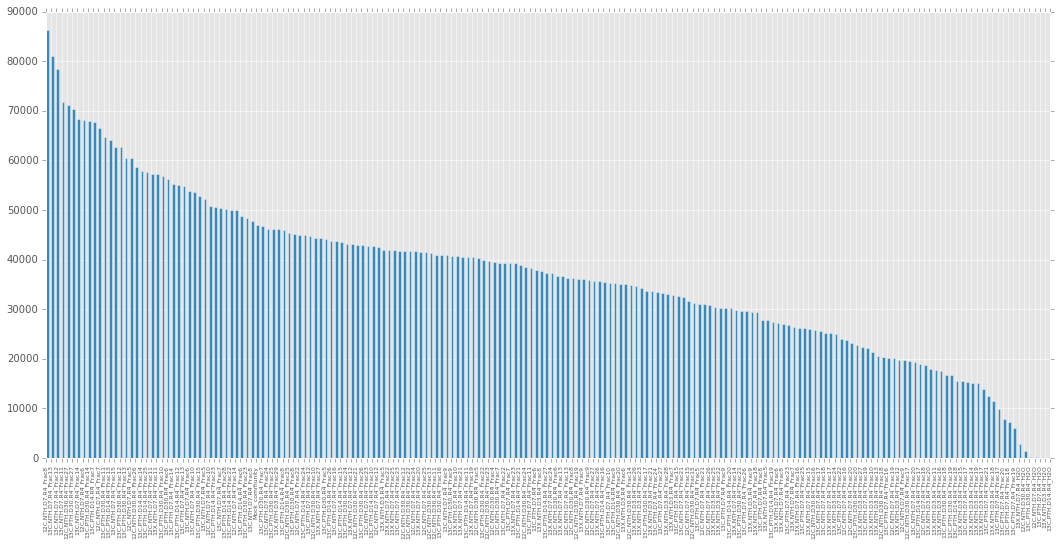

In [29]:
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.50)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)
xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=6)